In [1]:
from qiskit import __version__
print(__version__)
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister



2.0.1


In [2]:
print("Enter First Value:\n")

a= int(input())
print(a)

print("Enter Second Value:\n")
b=int(input())
print(b)

qubit_range = b-a+1
print("Range=", qubit_range)
qubit_numbers=0
while qubit_range>0:
    qubit_numbers+=1
    qubit_range//=2

print("Number Of Qubits=", qubit_numbers)


Enter First Value:

12
Enter Second Value:

51
Range= 40
Number Of Qubits= 6


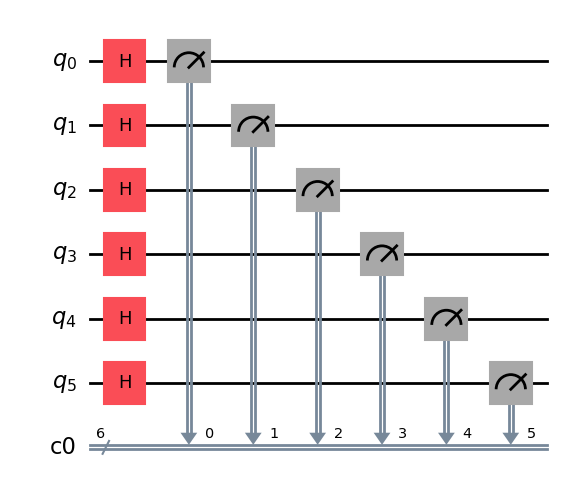

In [3]:
qubitstring = QuantumRegister(qubit_numbers,name= 'q')
Resultstring= ClassicalRegister(qubit_numbers)


# Draw circuit
qc = QuantumCircuit(qubitstring,Resultstring)

qc.h(qubitstring)

qc.measure(qubitstring, Resultstring)
qc.draw('mpl')


In [4]:
from qiskit_aer import AerSimulator
#execute
simulator =  AerSimulator()
job= simulator.run(qc, shots=1024)
result = job.result()
count = result.get_counts()


bitstrings = list(count.keys())
firstvalid=None
for bitstring in bitstrings:
    val = int(bitstring, 2)
    if val<=b-a:  # if target in range
        firstvalid = val
        firstvalid+=a
        break

print(firstvalid)


30


Generating samples for chi-square test...
Generated 644 valid samples

Chi-square Test Results:
Chi-square statistic: 44.4472
P-value: 0.2530
Degrees of freedom: 39
 No significant bias detected (p > 0.05)
The RNG appears to be uniform


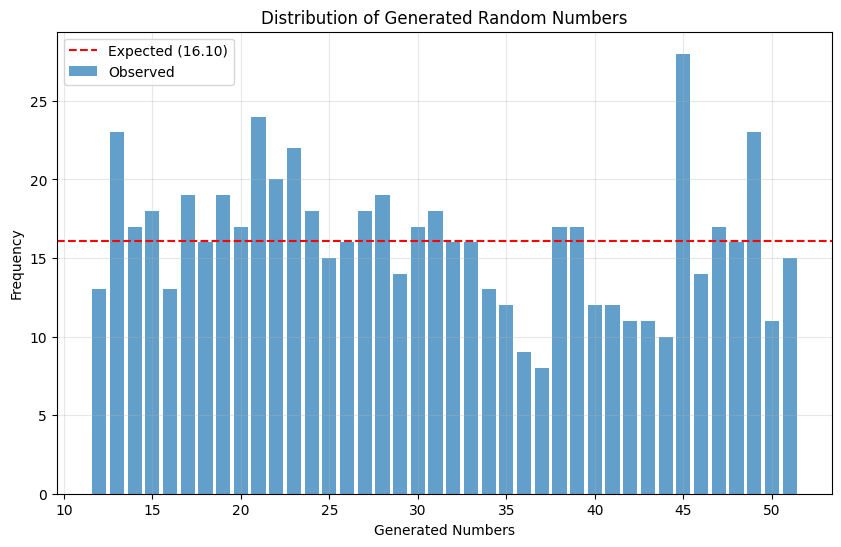

In [ ]:
from qiskit_aer.primitives import SamplerV2
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Use SamplerV2 for multiple runs
sampler = SamplerV2()
num_samples = 1024
valid_numbers = []

print("Generating samples for chi-square test...")

job = sampler.run([qc], shots=num_samples)
result = job.result()
int_counts = result[0].data.c0.get_int_counts()

for val, count in int_counts.items():
    if val <= b-a:
        valid_numbers.extend([val + a] * count)

print(f"Generated {len(valid_numbers)} valid samples")


expected_range = b - a + 1
observed_counts = np.bincount(np.array(valid_numbers) - a, minlength=expected_range)
expected_freq = len(valid_numbers) / expected_range
expected_counts = np.full(expected_range, expected_freq)


chi2_stat, p_value = stats.chisquare(observed_counts, expected_counts)

print(f"\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {expected_range - 1}")


alpha = 0.05
if p_value > alpha:
    print(f" No significant bias detected (p > {alpha})")
    print("The RNG appears to be uniform")
else:
    print(f" Potential bias detected (p ≤ {alpha})")
    print("The RNG may not be perfectly uniform")


plt.figure(figsize=(10, 6))
plt.bar(range(a, b+1), observed_counts, alpha=0.7, label='Observed')
plt.axhline(y=expected_freq, color='red', linestyle='--', label=f'Expected ({expected_freq:.2f})')
plt.xlabel('Generated Numbers')
plt.ylabel('Frequency')
plt.title('Distribution of Generated Random Numbers')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()